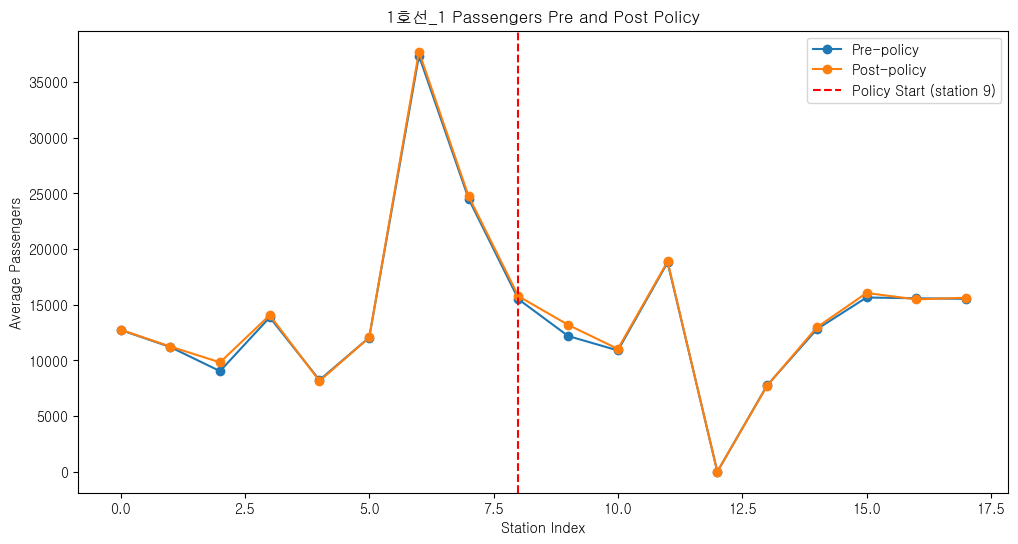

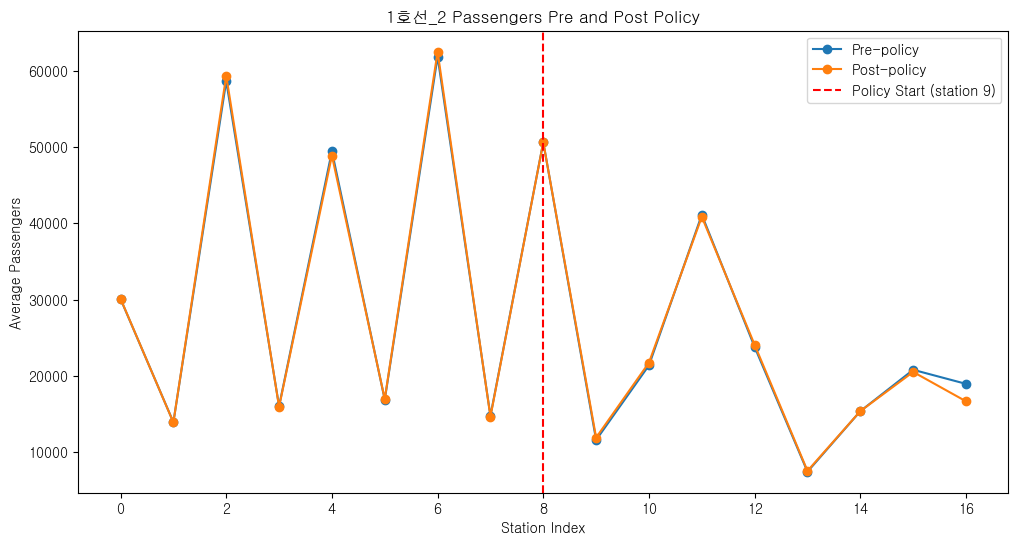

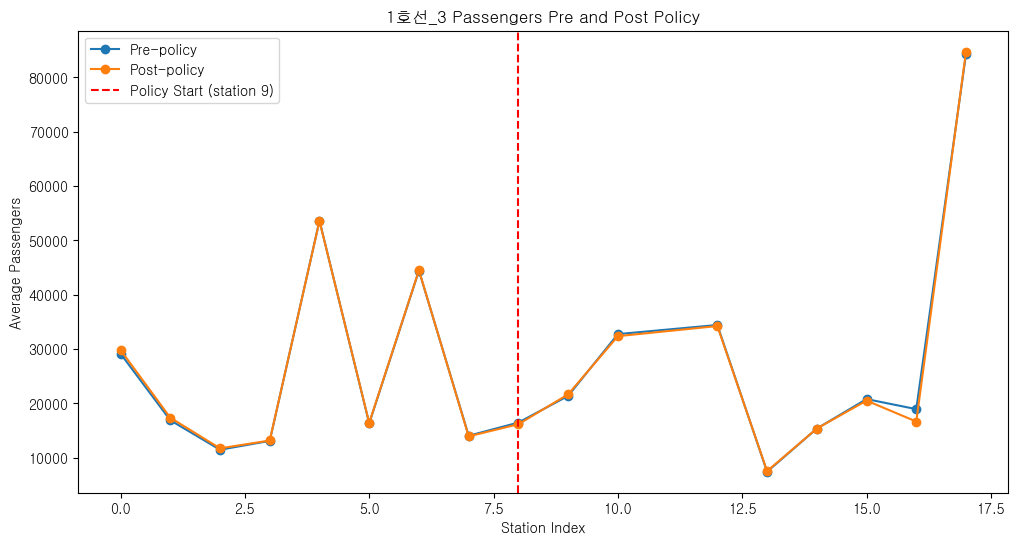

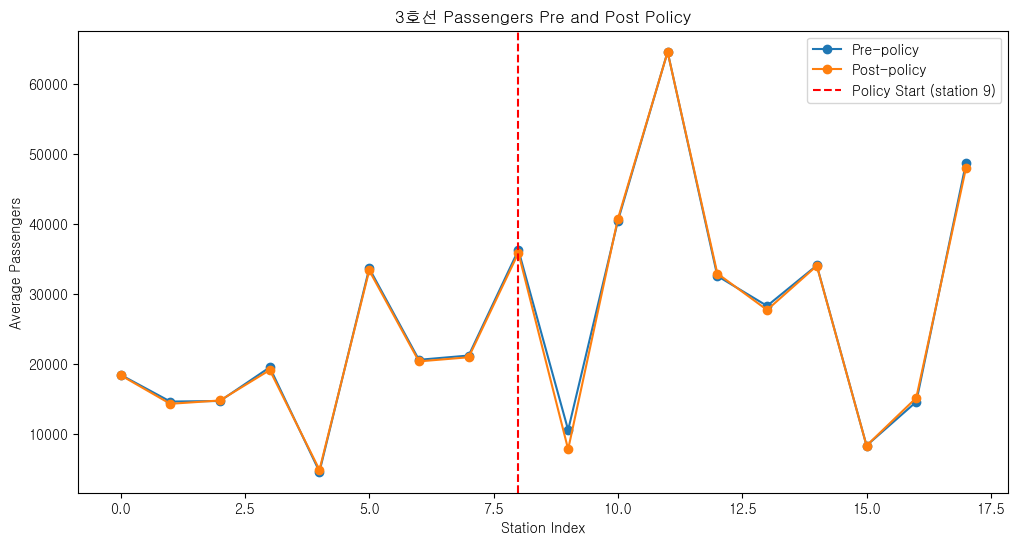

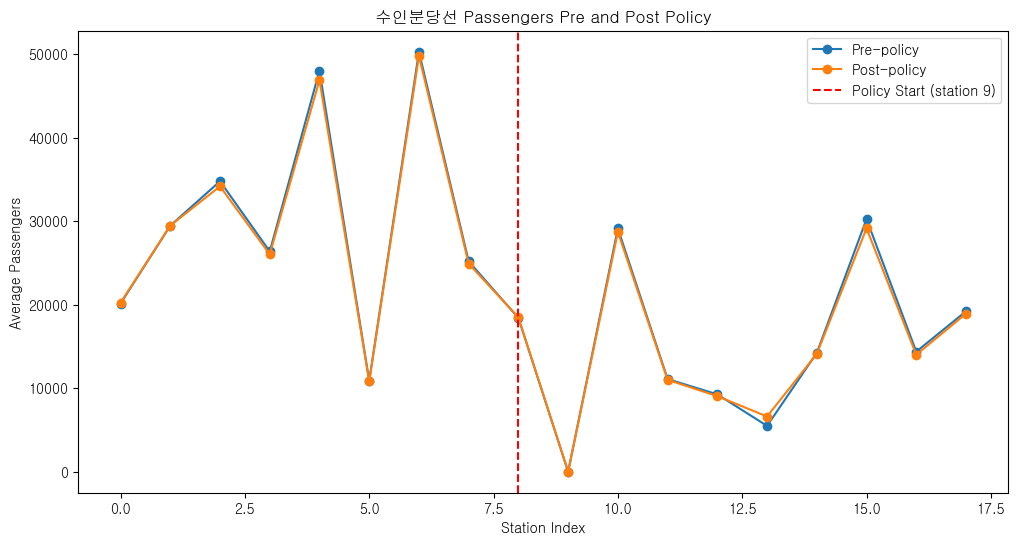

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

df = pd.read_csv('metro/result/metro_기후동행카드(노선+역_week).csv') # Load data

df = df[df["기후동행카드"] != '승차 불가능 / 하차 가능'] # '승하차 가능', '승하차 불가능'인 역만 사용

df['승객수'] = df['승차총승객수'] + df['하차총승객수']
df['treat'] = df['기후동행카드'].apply(lambda x: 1 if x == '승하차 가능' else 0)

# 0 ~ 8: untreated, 9 ~ 17: treated
lines = [
    {'1호선_1': ['지행', '덕정', '덕계', '양주', '녹양', '가능', '의정부', '회룡', '망월사', '도봉산', '도봉', '방학', '창동', '녹천', '월계', '광운대', '석계', '신이문']},
    {'1호선_2': ['동암', '백운', '부평', '부개', '송내', '중동', '부천', '소사', '역곡', '온수', '오류동', '개봉', '구일', '구로', '신도림', '신길', '대방', '노량진']},
    {'1호선_3': ['성균관대', '의왕', '당정', '군포', '금정', '명학', '안양', '관악', '석수', '금천구청', '독산', '남구로', '구로', '신도림', '신길', '대방', '노량진', '용산']},
    {'3호선': ['주엽', '정발산', '마두', '백석', '대곡', '화정', '원당', '원흥', '삼송', '지축', '구파발', '연신내', '불광', '녹번', '홍제', '무악재', '독립문', '경복궁']},
    {'수인분당선': ['오리', '미금', '정자', '수내', '서현', '이매', '야탑', '태평', '가천대', '복정', '수서', '대모산입구', '개포동', '구룡', '도곡', '선릉', '선정릉', '강남구청']}
]

# 전체 데이터 중 여기서 살펴보고자 하는 역 목록만으로 필터링
stations_set = set([station for line in lines for stations in line.values() for station in stations])
df = df[df['역명'].isin(stations_set)]

# 역명에 인덱스 추가
for line in lines:
    for line_name, stations in line.items():
        df.loc[df['역명'].isin(stations) & df['노선명'].str.contains(line_name.split('_')[0]), 'station_index'] = df['역명'].apply(lambda x: stations.index(x) if x in stations else None)

def plot_rdd(df, line_name, stations):
    line_filter = df['노선명'].str.contains(line_name.split('_')[0]) & df['역명'].isin(stations)
    pre_policy = df[line_filter & (df['after'] == 0)]
    post_policy = df[line_filter & (df['after'] == 1)]
    
    pre_policy_avg = pre_policy.groupby('station_index')['승객수'].mean()
    post_policy_avg = post_policy.groupby('station_index')['승객수'].mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(pre_policy_avg.index, pre_policy_avg, label='Pre-policy', marker='o')
    plt.plot(post_policy_avg.index, post_policy_avg, label='Post-policy', marker='o')
    plt.axvline(x=8, color='red', linestyle='--', label='Policy Start (station 9)')
    plt.title(f'{line_name} Passengers Pre and Post Policy')
    plt.xlabel('Station Index')
    plt.ylabel('Average Passengers')
    plt.legend()
    plt.show()

# 노선별 그래프 생성
for line in lines:
    for line_name, stations in line.items():
        plot_rdd(df, line_name, stations)